# Data Augmentation
A common problem is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the Data Augmentation technique comes in that, as the name suggests, allows us to augment our dataset in two ways:

* Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes...

* Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise... always maintaining the highest high resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

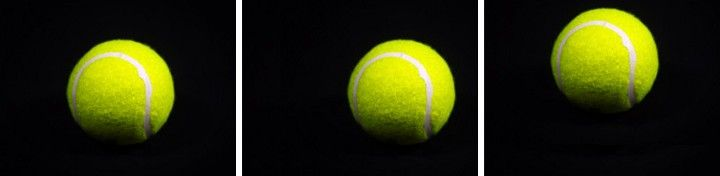



The same ball with some translations



So if you work with images, you only need to make a few small alterations to your dataset and you can achieve your goal.
There are many ways to augment data with images, such as:


1. Flip (Flip)
2. Rotation

1. Scale
2. Trimming

1. Translation
2. Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:


* Changes to the image (translations) through the **width_shift_range** and **height_shift_range** arguments.
* Flip the image using the **horizontal_flip** and **vertical_flip** arguments.
* Image rotations via the **rotation_range**
* Brightness of the image using the **brightness_range** argument.
* Image zoom using the **zoom_range** argument.

Let's independently look at examples of images after they have been augmented. It is common to use a variety of augmentation techniques at the same time during training.



In [7]:
import matplotlib.pyplot as plt #Library that allows you to plot, very MATLAB style
import numpy as np #Library allows you to work accordingly
from numpy import expand_dims #Expand the shape of the arrangement
from keras.preprocessing.image import load_img #De Keras library for data augmentation, we upload the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take an image (PIL) and converts it to an array. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #clase that takes original data, transforms it randomly, and returns only new transformed data
from PIL import Image #library of python images
from urllib.request import urlopen #Permite read an electronic address



First we upload an image from the internet


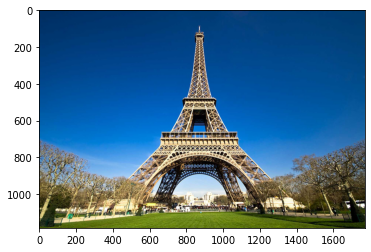

In [8]:
url = 'https://www.mapade.org/wp-content/uploads/mapa-de-paris.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with an image change that means moving all the pixels in the image in one direction, such as horizontally or vertically, while maintaining the same dimensions of the image.

The ImageDataGenerator width_shift_range and height_shift_range arguments control the amount of horizontal and vertical scrolling respectively.


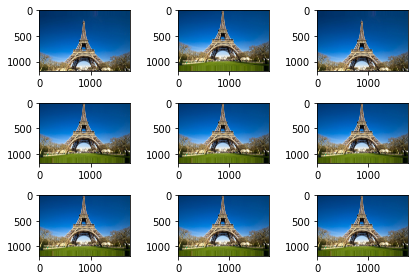

In [9]:
#We convert the image to an arrangement
data = img_to_array(img)
#We expand to a sample 
samples= expand_dims(data, 0)
#We created the data booster using only imgen change 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
#We prepare the iterator
it = datagen.flow(samples, batch_size =1)
#We generate samples and show the results
for i in range(9):
	plt.subplot(330 + 1 + i)
#Batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #se to a valid value so that it can be displayed as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the ImageDataGenerator class.

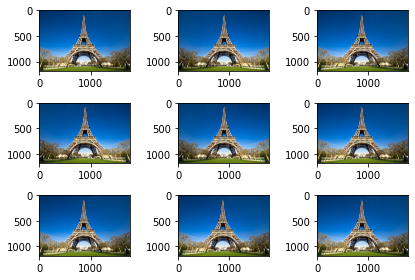

In [10]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The zoom amount is sampled evenly randomly from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] ? [1-zoom_range, 1 + zoom_range]

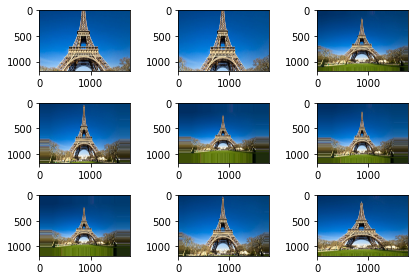

In [11]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The clockwise image is randomly rotated a certain number of degrees from 0 to 360. You are likely to rotate pixels outside the image frame and leave areas of the frame without pixel data, which need to be completed.

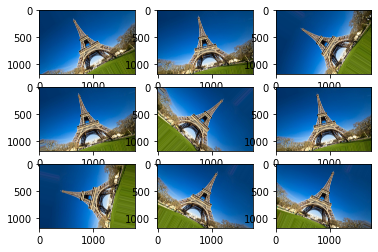

In [12]:
datagen = ImageDataGenerator(rotation_range=80)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the accuracy of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

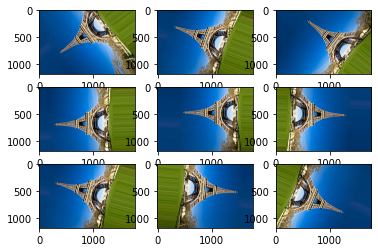

In [13]:
datagen = ImageDataGenerator(
            rotation_range               = 120,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of language (we cannot replace each word with its synonym and even if we do, we run the risk that the meaning of prayer will change completely.
There are some libreries that can help us perform this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

**Image Super-Resolution using an Efficient Sub-Pixel CNN**


This is the setup for we need to do this function


In [ ]:
import tensorflow as tf

import os
import math
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython.display import display

We use the built-in **keras.utils.get_file utility** to retrieve the dataset.

In [ ]:

dataset_url = "http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz"
data_dir = keras.utils.get_file(origin=dataset_url, fname="BSR", untar=True)
root_dir = os.path.join(data_dir, "BSDS500/data")

We create training and validation datasets via **image_dataset_from_directory.**

In [ ]:

crop_size = 300
upscale_factor = 3
input_size = crop_size // upscale_factor
batch_size = 8

train_ds = image_dataset_from_directory(
    root_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode=None,
)

valid_ds = image_dataset_from_directory(
    root_dir,
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode=None,
)

Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.


We rescale the images to take values in the range [0, 1].

In [ ]:
def scaling(input_image):
    input_image = input_image / 255.0
    return input_image


# Scale from (0, 255) to (0, 1)
train_ds = train_ds.map(scaling)
valid_ds = valid_ds.map(scaling)

Let's visualize a few sample images:

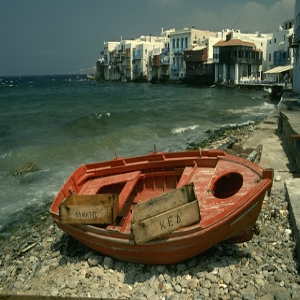

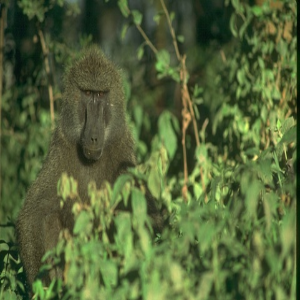

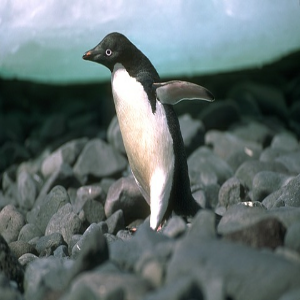

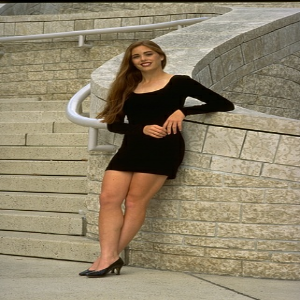

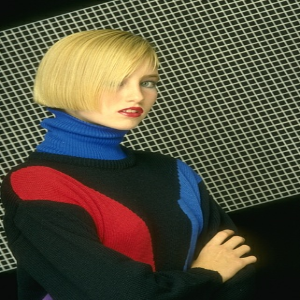

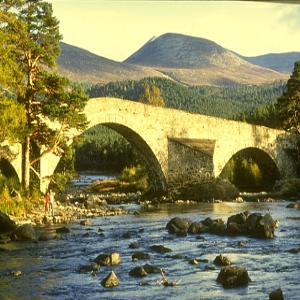

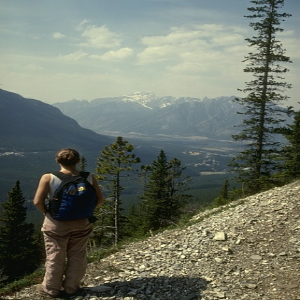

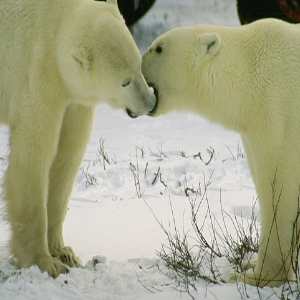

In [ ]:
for batch in train_ds.take(1):
    for img in batch:
        display(array_to_img(img))

# TextAttack
Es un framework de Python para ataques de adversario, entrenamiento de adversarios y aumento de datos en NLP. Nos centraremos solo en el aumento de datos.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 5.7MB/s 
     |████████████████████████████████| 245kB 18.4MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 3.0MB 23.0MB/s 
     |████████████████████████████████| 317kB 53.1MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 778kB 44.5MB/s 
     |████████████████████████████████| 1.7MB 49.5MB/s 
     |████████████████████████████████| 235kB 54.1MB/s 
     |████████████████████████████████| 1.1MB 54.7MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 686kB 52.4MB/s 
     |████████████████████████████████| 153kB 48.3MB/s 
     |████████████████████████████████| 19.7MB 1.6MB/s 
     |████████████████████████████████| 798kB 50.3MB/s 
     |████████████████████████████████| 276kB 49.5MB/s 
     |████████████████████████████████| 1.1MB 49.5MB/s 
     |████████████████████████████████| 983kB 49.5MB/

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-09 21:37:47 INFO: Downloading default packages for language: en (English)...
2020-10-09 21:39:27 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack nos proporciona cuatro métodos para el aumento de datos.


## WordNetAugmenter
Aumenta el texto reemplazándolo con sinónimos del tesauro (diccionario de sinónimos) de WordNet.

WordNet es una base de datos léxica del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos (synsets), cada uno de los cuales expresa un concepto distinto.
WordNet se parece superficialmente a un tesauro, ya que agrupa las palabras en función de su significado.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and enounce, I wish I had, or I’m glad I did?']


## EmbeddingAugmenter
 Aumenta el texto transformando palabras con sus incrustaciones, con una restricción para garantizar que su similitud de coseno sea de al menos 0,8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:13<00:00, 35.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp5nhskcvl.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I wish I had, or I’m delighted I did?']

## CharSwapAugmenter
Aumenta el texto sustituyendo, eliminando, insertando e intercambiando caracteres adyacentes.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you jlook back on life and say, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
Esto aumenta el texto con una combinación de reemplazo de sinónimos de Wordnet, eliminación de palabras, cambios de orden de palabras e inserciones de sinónimos. Todas estas 4 funcionalidades ocurren de forma aleatoria. Entonces obtendremos resultados diferentes cada vez que ejecutemos el código. Esto devuelve 4 resultados aumentados, a diferencia de los otros métodos.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back front on life and say, I wish I had, or I’m glad I did?',
 'Will you look gage on life and say, I wish I had, or I’m glad I did?',
 'wish you look back on life and say, I Will I had, or I’m glad I did?',
 'Will you look back life and say, I wish I had, or I’m glad I did?']

Googletrans  utiliza la API Ajax de Google Translate para la detección y traducción de idiomas.

Los parámetros clave para el método **translate ()** son:



1.   **src**: idioma de origen. este parámetro es opcional ya que **googletrans** lo detectará.
2.   **dest**: idioma de destino. Parámetro obligatorio.

1.   **text**: el texto que se va a traducir del idioma de origen al idioma de destino. Parámetro obligatorio.





 



Al utilizar este metodo lo que ocurre es una retraduccion, pasamos del idioma original a un idioma destino y luego regresamos al original, durante esta retrotraducción, hay un ligero cambio en la oración entre el texto original y el texto retrotraducido, pero el significado general de la oración aún se conserva.

Los idiomas soportados se pueden consultar en https://cloud.google.com/translate/docs/languages?hl=es

Para obtener los mejores resultados se recomienda hacer algunas pruebas con los idiomas, si el lenguaje destino es muy similar la traduccion no pierde informacion, sin embargo se puede tener el problema de que la traduccion sea demasiado literal, esto se vuelve un poco un problema de prueba y error.


Algunos ejemplos de idiomas:


*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 972kB 13.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9ec598d60050848178252b4865cf48c183ecd0e20fe43477001f02cc009d24ef
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4a5e5eab9a5f1aed0dda9b8a3f0e66dedca848a10bb6448495fbda5dfbdc70cf
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.
